# 数据清洗

In [41]:
#导入需要使用的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
#使用pandas读取数据
train = pd.read_csv("inputs/train.csv")
test = pd.read_csv("inputs/test.csv")
store = pd.read_csv("inputs/store.csv")

/Users/limao/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#查看train数据的前五行
train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [18]:
#查看train中每个特征的unique值
feature_list = train.columns.values.tolist()
for feature in feature_list:
    print('{} 唯一值数量:'.format(feature),len(train[feature].unique()))

Store 唯一值数量: 1115
DayOfWeek 唯一值数量: 7
Date 唯一值数量: 942
Sales 唯一值数量: 21734
Customers 唯一值数量: 4086
Open 唯一值数量: 2
Promo 唯一值数量: 2
StateHoliday 唯一值数量: 5
SchoolHoliday 唯一值数量: 2


In [19]:
#unique值检查中发现StateHoliday有异常.检查发现是有把数字0和字符‘0’混淆
train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [29]:
#检查train数据集是否有空缺值
train.isnull().any(axis=0)

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [8]:
#打印train训练集的信息
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
#查看store数据集的前五行
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [23]:
for column in store:
    print('{} 的唯一值:'.format(column),len(store[column].unique()))

Store 的唯一值: 1115
StoreType 的唯一值: 4
Assortment 的唯一值: 3
CompetitionDistance 的唯一值: 655
CompetitionOpenSinceMonth 的唯一值: 13
CompetitionOpenSinceYear 的唯一值: 24
Promo2 的唯一值: 2
Promo2SinceWeek 的唯一值: 25
Promo2SinceYear 的唯一值: 8
PromoInterval 的唯一值: 4


In [24]:
#CompetitionOpenSinceMonth 有13个unique值，检查发现是有nan，应该代表具体月份不详
store.CompetitionOpenSinceMonth.unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [25]:
#PromoInterval 只有 4个unique值，查看一下
store.PromoInterval.unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [31]:
#检查store数据集是否有空缺值.发现CompetitionDistance等列有空缺值，分析应该是表示该行的Store没有竞争对手，所以含有competition三列为NaN
#Promo2为0情况下，自然Promo2SinceWeek/Year列为NaN
store.isnull().any(axis=0)

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [10]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [26]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [27]:
for feature in test:
    print('{} 唯一值数量:'.format(feature),len(test[feature].unique()))

Id 唯一值数量: 41088
Store 唯一值数量: 856
DayOfWeek 唯一值数量: 7
Date 唯一值数量: 48
Open 唯一值数量: 3
Promo 唯一值数量: 2
StateHoliday 唯一值数量: 2
SchoolHoliday 唯一值数量: 2


In [28]:
#test 中open的数量为3，检查发现有NaN
test.Open.unique()

array([ 1., nan,  0.])

In [32]:
#检查test中空缺值
test.isnull().any(axis=0)


Id               False
Store            False
DayOfWeek        False
Date             False
Open              True
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

## 对空缺值做处理

In [34]:
#store中的NaN用0填充
store.fillna(0,inplace = True)

#test中的NaN用1填充
test.fillna(1,inplace = True)

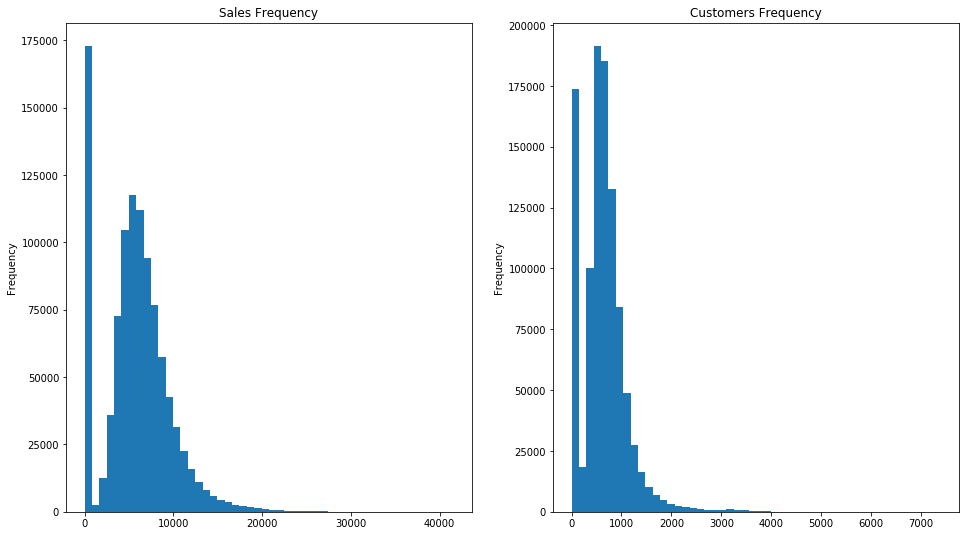

In [38]:
#考察最重要的sales/customers分布
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(16, 9))

train['Sales'].plot(kind='hist', bins=50, ax=axis1,title='Sales Frequency')
train['Customers'].plot(kind='hist', bins=50, ax=axis2, title='Customers Frequency')

In [51]:
#观察到customer/sales都有为0的情况，如果商店开门销售额为0，则认为是异常值

train[(train['Open']!=0 )&(train['Sales']==0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
86825,971,5,2015-05-15,0,0,1,0,0,1
142278,674,4,2015-03-26,0,0,1,0,0,0
196938,699,4,2015-02-05,0,0,1,1,0,0
322053,708,3,2014-10-01,0,0,1,1,0,0
330176,357,1,2014-09-22,0,0,1,0,0,0
340348,227,4,2014-09-11,0,0,1,0,0,0
340860,835,4,2014-09-11,0,0,1,0,0,0
341795,835,3,2014-09-10,0,0,1,0,0,0
346232,548,5,2014-09-05,0,0,1,1,0,1
346734,28,4,2014-09-04,0,0,1,1,0,0


Text(0.5,1,'Average Customers per Day')

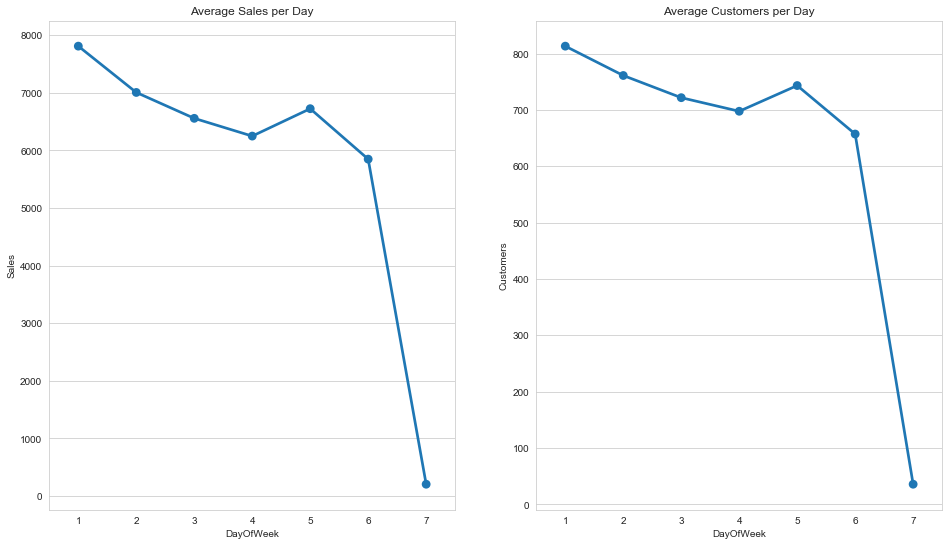

In [55]:
#一周每天的sales、customer平均值分布，可以看到星期天平均值明显较低，是因为星期天很多商店不开门

sns.set_style("whitegrid")

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(16, 9))
sns.pointplot(x="DayOfWeek", y="Sales", data=train, order=[1, 2, 3, 4, 5, 6, 7], ax=axis1)
axis1.set_title("Average Sales per Day")

sns.pointplot(x="DayOfWeek", y="Customers", data=train, order=[1, 2, 3, 4, 5, 6, 7], ax=axis2)
axis2.set_title("Average Customers per Day")


Text(0.5,1,'Average Customers per Day for Open Shops')

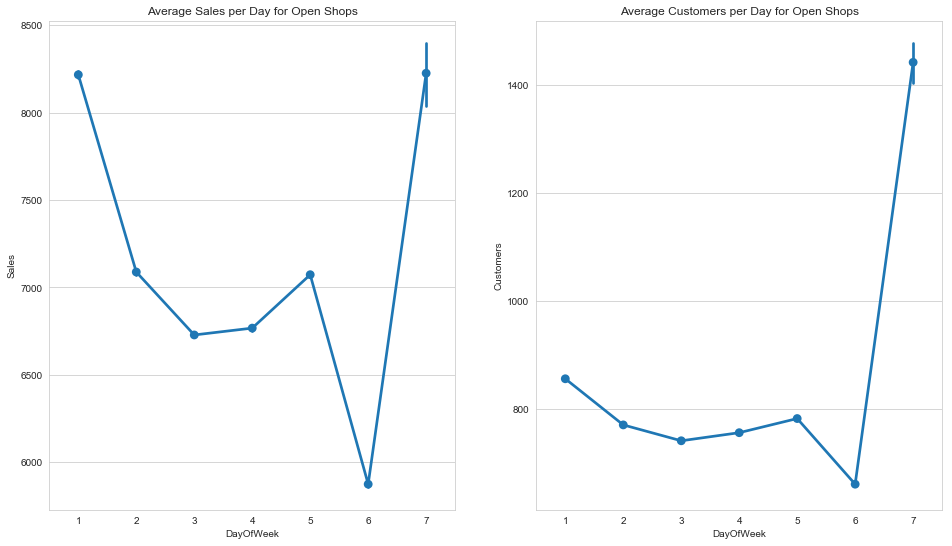

In [57]:
#只考察开门商店的平均值分布,反而可以看到周日只要是开门的商店，customer、sales都比较高
sns.set_style("whitegrid")

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(16, 9))
sns.pointplot(x="DayOfWeek", y="Sales", data=train[train['Open']==1], order=[1, 2, 3, 4, 5, 6, 7], ax=axis1)
axis1.set_title("Average Sales per Day for Open Shops")

sns.pointplot(x="DayOfWeek", y="Customers", data=train[train['Open']==1], order=[1, 2, 3, 4, 5, 6, 7], ax=axis2)
axis2.set_title("Average Customers per Day for Open Shops")


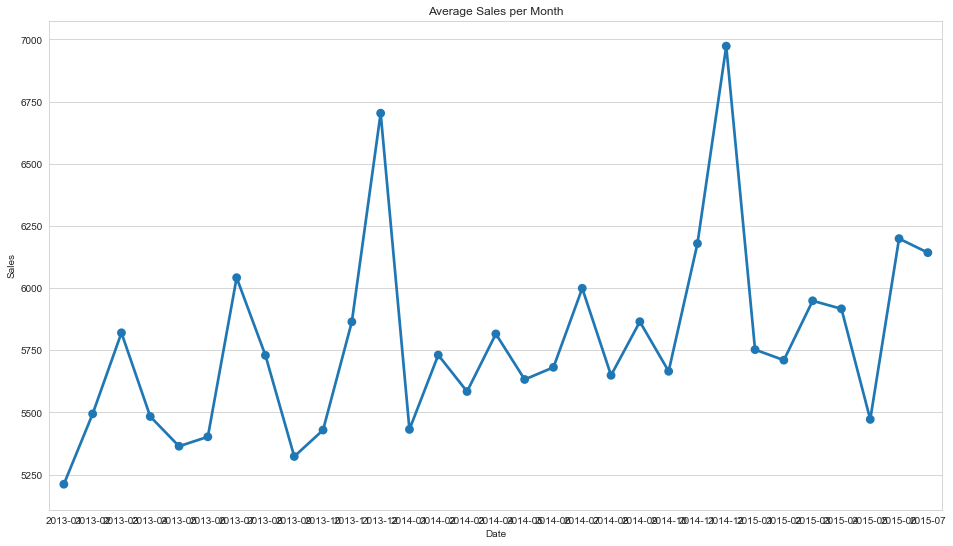

In [71]:
#查看销售额销售额的月度分布,很明显每年的11-12月都是销售的高峰时期

train.Date = pd.to_datetime(train.Date)

sns.set_style("whitegrid")
fig, axis = plt.subplots(1, 1, figsize=(16, 9))
axis.set_title("Average Sales per Month")

sns.pointplot(x="Date", y="Sales", data=train.groupby('Date')['Sales'].mean().resample('M',kind ='period').mean().reset_index(), ax=axis)



Text(0.5,0,'Sales')

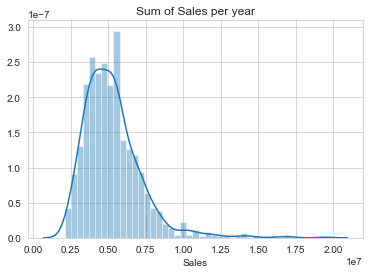

In [66]:
#查看每个商店年度销售量总和的分布，绝大多数商店年销售额在250-750万美元之间

sns.distplot(train.groupby('Store')['Sales'].sum())
plt.title('Sum of Sales per year')
plt.xlabel('Sales')

## 将 train 与 store 数据表合并

In [59]:
#以Store为关键字合并

train_comb = pd.merge(train,store,on ='Store',how = 'left')

#将日期数据转换为时间类型

train_comb.Date = pd.to_datetime(train_comb.Date)

#打印查看数据
train_comb.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


### 探索销售量与时间月份的关系

In [68]:
#考察不同年份见每月的销售量
#先将date分离成年月日

train_comb['year'] = train_comb.Date.map(lambda x:x.year)
train_comb['month'] = train_comb.Date.map(lambda x:x.month)
train_comb['day'] = train_comb.Date.map(lambda x:x.day)

train_comb.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31


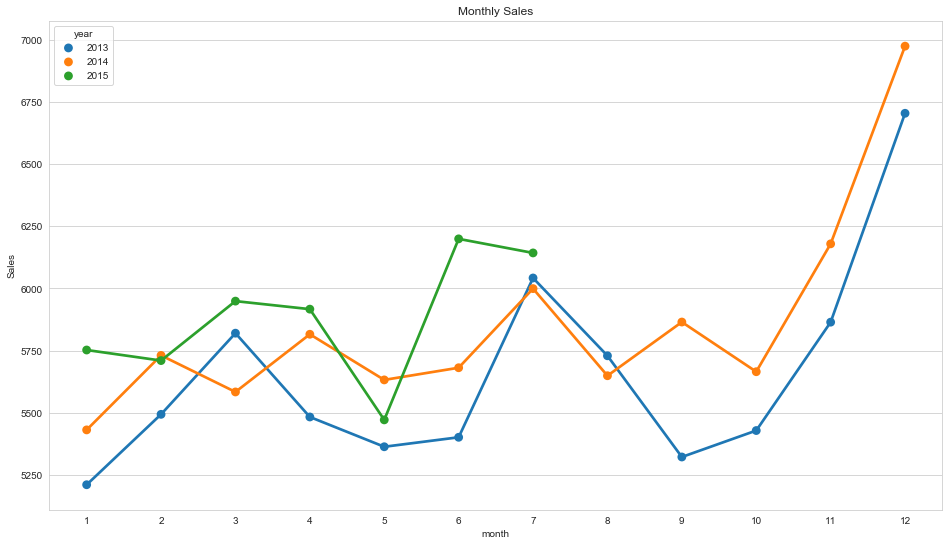

In [69]:
#分年的月度销售量分布图,也可以看到每年11-12月销售量快速增长

sns.set_style("whitegrid")
fig, axis = plt.subplots(1, 1, figsize=(16, 9))
axis.set_title("Monthly Sales")

sns.pointplot(x="month", y="Sales", data=train.groupby([train_comb.year,train_comb.month]).mean().reset_index(),hue='year', ax=axis)



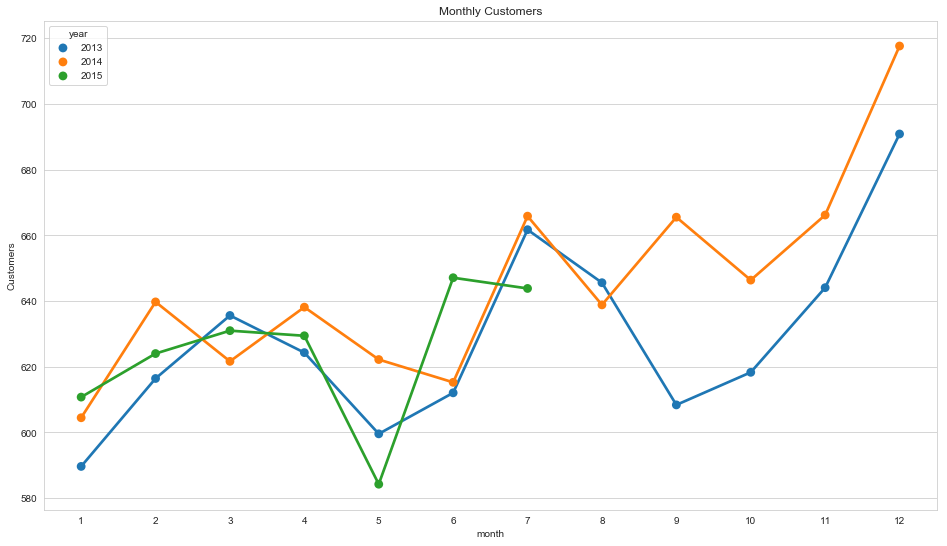

In [74]:
#分年的顾客数量分布图,与销售量类似分布，每年5-6月顾客数量最少

sns.set_style("whitegrid")
fig, axis = plt.subplots(1, 1, figsize=(16, 9))
axis.set_title("Monthly Customers")

sns.pointplot(x="month", y="Customers", data=train.groupby([train_comb.year,train_comb.month]).mean().reset_index(),hue='year', ax=axis)



### 探索销售量与假期/促销的关系

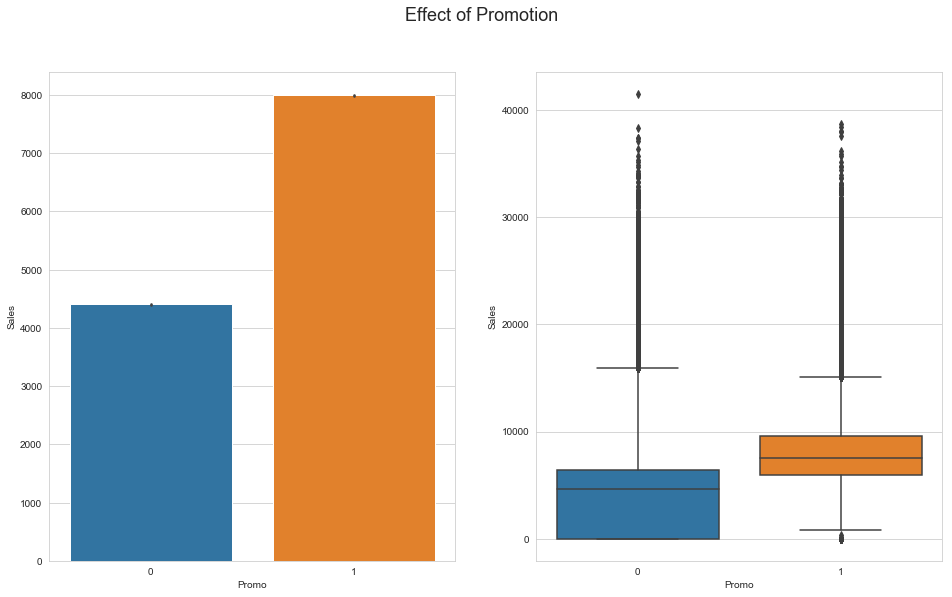

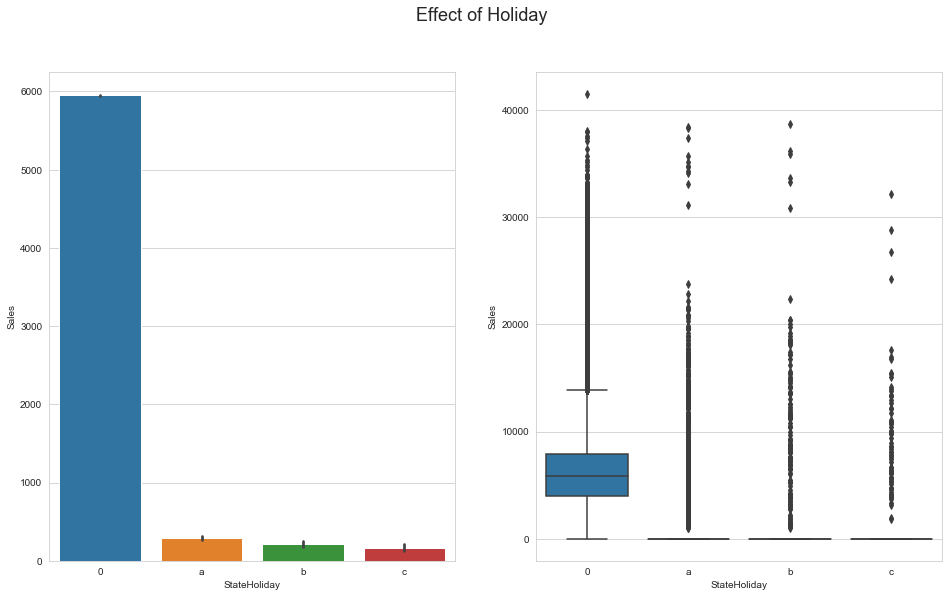

In [83]:
#销售量与假期/促销的关系.因为节假日很多商店关门所以平均销售量明显低于非节假日


fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(16, 9))
fig.suptitle("Effect of Promotion",fontsize =18)
sns.barplot(x = 'Promo', y = 'Sales',data = train_comb,ax=axis1)
sns.boxplot(x = 'Promo', y = 'Sales',data = train_comb, ax=axis2)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(16, 9))
fig.suptitle("Effect of Holiday",fontsize =18)
train_comb['StateHoliday'] = train_comb['StateHoliday'].astype(str)
sns.barplot(x = "StateHoliday", y = "Sales",data = train_comb,ax=axis1)
sns.boxplot(x = "StateHoliday", y = "Sales",data = train_comb, ax=axis2)

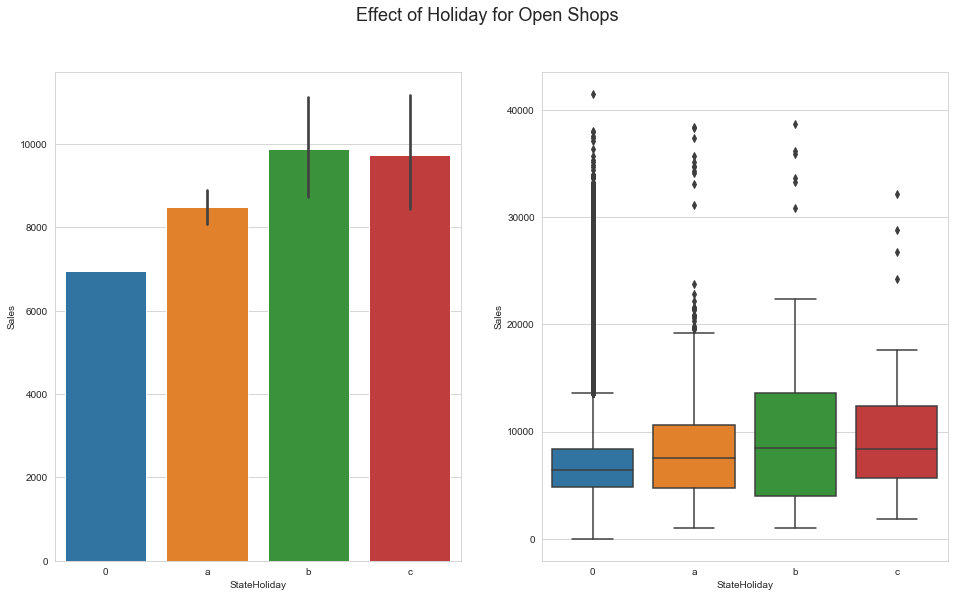

In [93]:
# 只参考节假日还营业商店的销售量

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(16, 9))
fig.suptitle("Effect of Holiday for Open Shops",fontsize =18)


train['StateHoliday'] = train['StateHoliday'].astype(str)

sns.barplot(x = "StateHoliday", y = "Sales",data = train[train['Open']==1],ax=axis1)
sns.boxplot(x = "StateHoliday", y = "Sales",data = train[train['Open']==1], ax=axis2)

Text(0.5,1,'Sales for State Holidays')

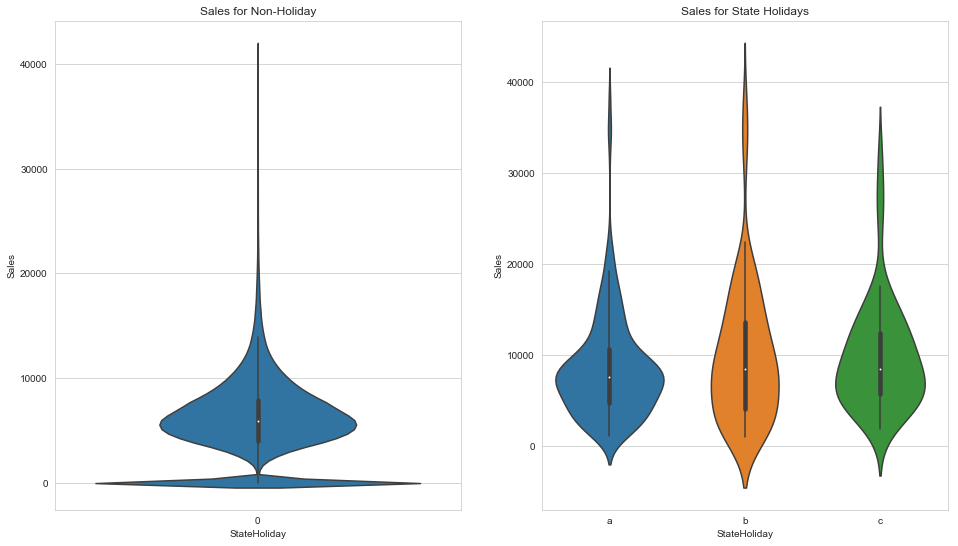

In [96]:
#可以看到只要节假日还在营业的店，销售量和非节假日并没有太大差别
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(16, 9))

sns.violinplot(x = 'StateHoliday',y = 'Sales',data = train_comb[train_comb.StateHoliday == '0'],ax = axis1)
axis1.set_title('Sales for Non-Holiday')

sns.violinplot(x = 'StateHoliday',y = 'Sales',data = train_comb[(train_comb.StateHoliday !='0')&(train_comb.Open == 1)],ax = axis2)
axis2.set_title('Sales for State Holidays')

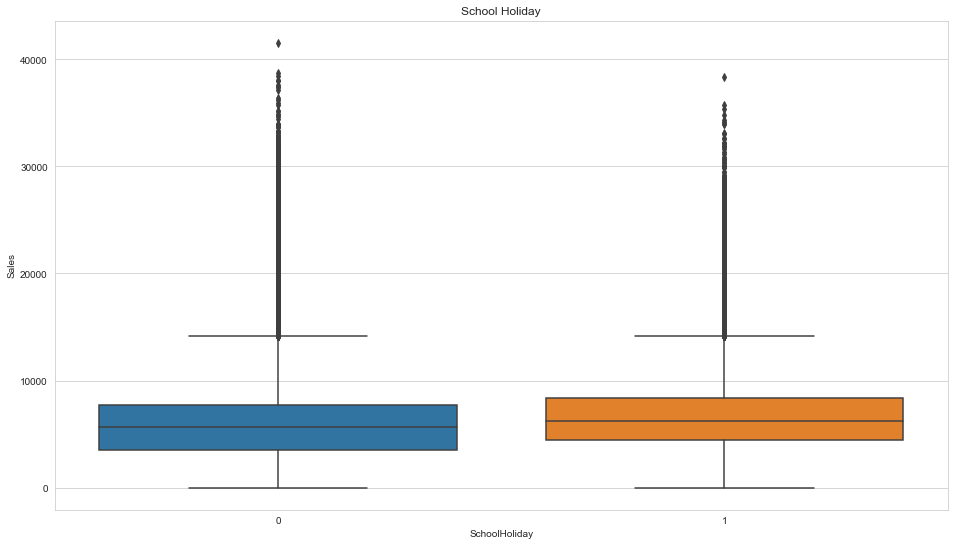

In [99]:
#考察学校假日对销售量的影响,可以看到学校是否放假影响不大

fig, axis = plt.subplots(1, 1, figsize=(16, 9))
axis.set_title("School Holiday")
sns.boxplot(x = 'SchoolHoliday',y = 'Sales',data = train_comb)

### 药店类型的影响

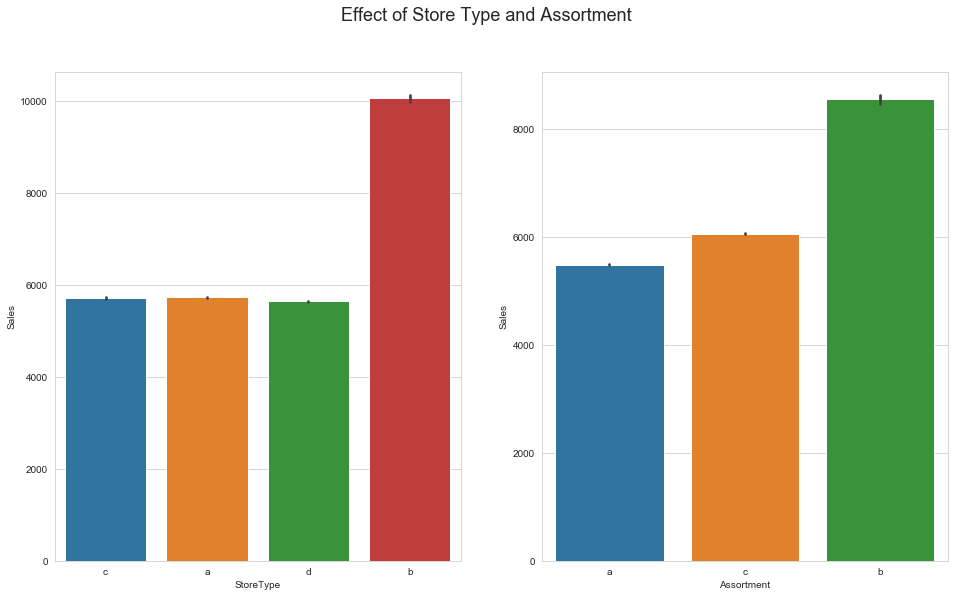

In [100]:
#storetype和assortment均为b的商店销量高一些

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(16, 9))
fig.suptitle("Effect of Store Type and Assortment",fontsize =18)
sns.barplot(x = 'StoreType', y = 'Sales',data = train_comb,ax=axis1)
sns.barplot(x = 'Assortment', y = 'Sales',data = train_comb, ax=axis2)

### 探索竞争者与销量的关系

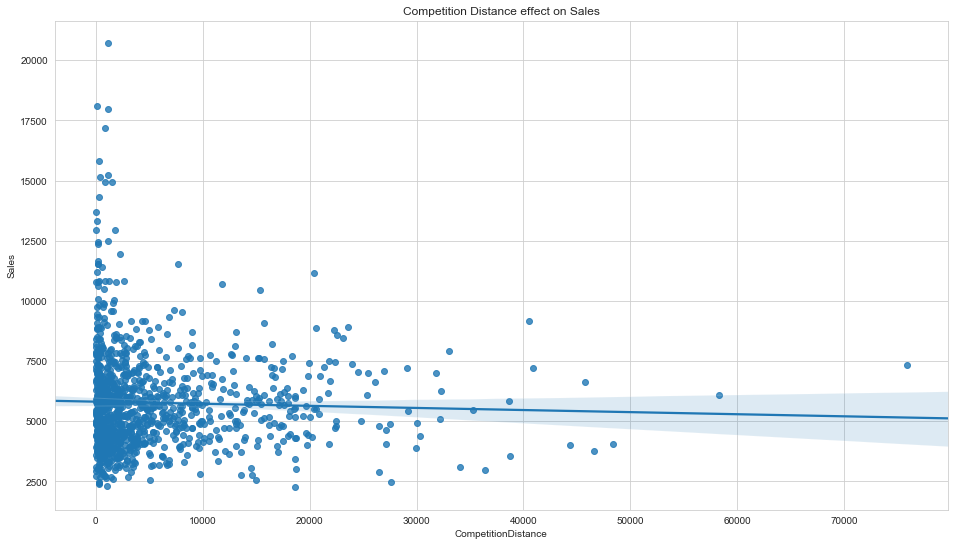

In [106]:
#竞争者平均距离与每个店平均销量的关系，采用回归
#这个图如何解读？同样销售量下，竞争者距离越近，能够达到这一销量的药店数量越多
fig, axis = plt.subplots(1, 1, figsize=(16, 9))
axis.set_title("Competition Distance effect on Sales")

sns.regplot(x = 'CompetitionDistance',y = 'Sales',data = train_comb.groupby('Store')['CompetitionDistance','Sales'].agg({'CompetitionDistance':'mean','Sales':'mean'}))